In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

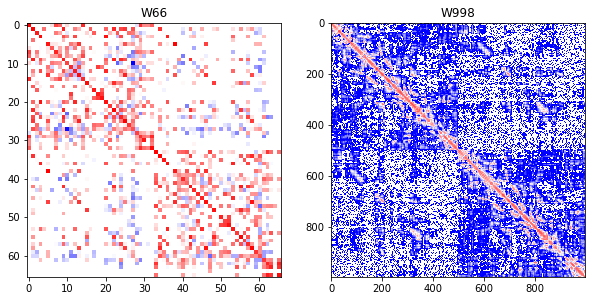

In [2]:
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")
W998=np.loadtxt("../Data/connectivity_matrix/group_mean_connectivity_matrix_file.txt")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(W66, norm=colors.LogNorm(), cmap='bwr')
plt.title('W66')
plt.subplot(1,2,2)
plt.imshow(W998, norm=colors.LogNorm(), cmap='bwr')
plt.title('W998')

plt.show()

In [3]:
# Draw histogram of occurrences of connections, but remove "0" weights
w66_0=W66[W66!=0].flatten()
w998_0=W998[W998!=0].flatten()

w66_r=np.copy(W66[0:33, 33:])
w66_reduced=w66_r[w66_r!=0].flatten()

w998_r=np.copy(W998[0:499, 499:])
w998_reduced=w998_r[w998_r!=0].flatten()

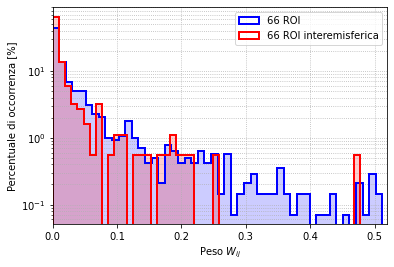

In [39]:
hist,bins=np.histogram(w66_0, bins=50)
hist_,bins_=np.histogram(w66_reduced, bins=50)

#plt.title('Distribuzione dei pesi per i due connettomi')
#plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), log=True, color='blue',histtype='step',linewidth=2, label='66 ROI')
#plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum()*100, width=(bins[1]-bins[0]), log=True, color='blue',alpha=0.2)

#plt.bar(bins_[:-1], hist_.astype(np.float32) / hist_.sum()*100, width=(bins_[1]-bins_[0]), log=True, color='red',histtype='step',linewidth=2,color='b', label='66 ROI interemisferica')
#plt.bar(bins_[:-1], hist_.astype(np.float32) / hist_.sum()*100, width=(bins_[1]-bins_[0]), log=True, color='red',alpha=0.2)

plt.hist(w66_0,log=True,range=(0,w66_0.max()), bins=50,density=True,color='b', histtype='step',linewidth=2, label='66 ROI')
plt.hist(w66_0,log=True,range=(0,w66_0.max()), bins=50,density=True,color='b', alpha=0.2)

plt.hist(w66_reduced,log=True, bins=50,density=True,histtype='step',linewidth=2,color='r', label='66 ROI interemisferica')
plt.hist(w66_reduced,log=True, bins=50,density=True,color='r', alpha=0.2 )

plt.xlim(0,0.52)
plt.ylabel('Percentuale di occorrenza [%]')
plt.xlabel(r'Peso $W_{ij}$')
plt.grid(True,which="both", linestyle="dotted")
plt.legend()
plt.savefig('../Figure/connettoma_modificato.pdf',bbox_inches='tight')
plt.show()

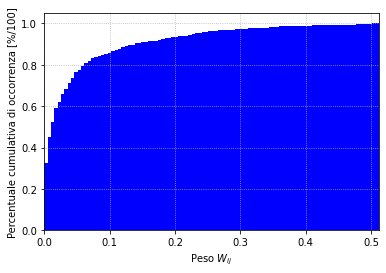

In [40]:


plt.hist(w66_0,log=False, bins=100,density=True,cumulative=True,color='b',linewidth=1.5, alpha=1)
#plt.hist(w66_0,log=True, bins=50,density=True,color='b', alpha=0.2, cumulative=True)

#plt.hist(w66_reduced,log=True, bins=50,density=True,histtype='step',linewidth=2,color='b', label='66 ROI interemisferica')
#plt.hist(w66_reduced,log=True, bins=50,density=True,color='b', alpha=0.2 )

plt.xlim(0.0,w66_0.max())
plt.ylabel('Percentuale cumulativa di occorrenza [%/100]')
plt.xlabel(r'Peso $W_{ij}$')
plt.grid(True, which="both", linestyle='dotted')
#plt.legend()
plt.savefig('../Figure/connettoma_cumulativa.pdf',bbox_inches='tight')
plt.show()

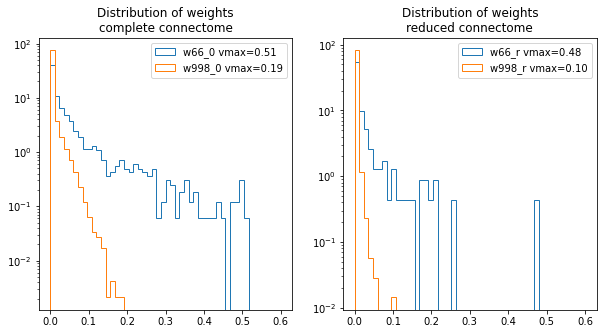

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(w66_0,log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='w66_0 vmax=%.2f'%w66_0.max())
plt.hist(w998_0, log=True,bins=50,range=(0,0.6), density=True,histtype='step', label='w998_0 vmax=%.2f'%w998_0.max())
plt.legend()
plt.title('Distribution of weights\ncomplete connectome')

plt.subplot(1,2,2)
plt.hist(w66_reduced,log=True, bins=50,range=(0,0.6),density=True,
         histtype='step', label='w66_r vmax=%.2f'%w66_reduced.max())
plt.hist(w998_reduced, log=True,bins=50,range=(0,0.6), density=True,
         histtype='step', label='w998_r vmax=%.2f'%w998_reduced.max())
plt.legend()
plt.title('Distribution of weights\nreduced connectome')

plt.show()

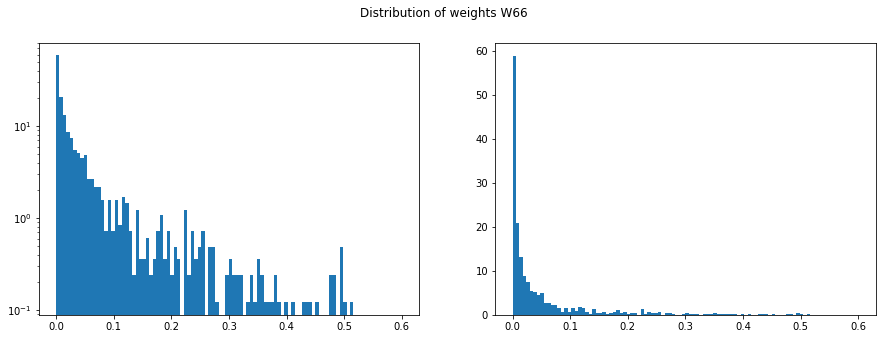

In [7]:
#The same as before but donw with numpy and only for w66_0

hist, binning = np.histogram(w66_0 ,bins=100,range=(0,0.6), density=True)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge', log=True)
plt.subplot(1,2,2)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge')
plt.suptitle('Distribution of weights W66')


plt.show()

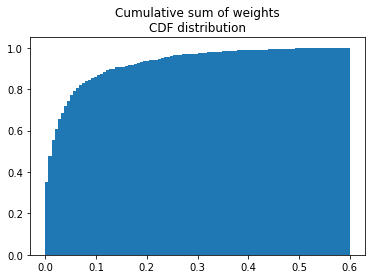

In [8]:
# cumulative sum will be used to derive the generated pdf of weights
cumsum=np.cumsum(hist/hist.sum())

plt.bar(binning[:-1], cumsum, width=np.diff(binning), align='edge')
plt.title('Cumulative sum of weights\nCDF distribution')
plt.show()

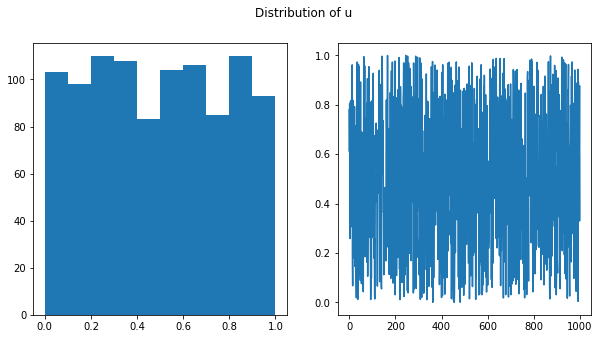

In [9]:
new_nodes=1000 # has to be less than the number of zero entries in LR connectome
u=np.random.uniform(0,1, new_nodes)
w_n=binning[np.searchsorted(cumsum[:-1],u)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(u)
plt.subplot(1,2,2)
plt.plot(u)
plt.suptitle('Distribution of u')
plt.show()

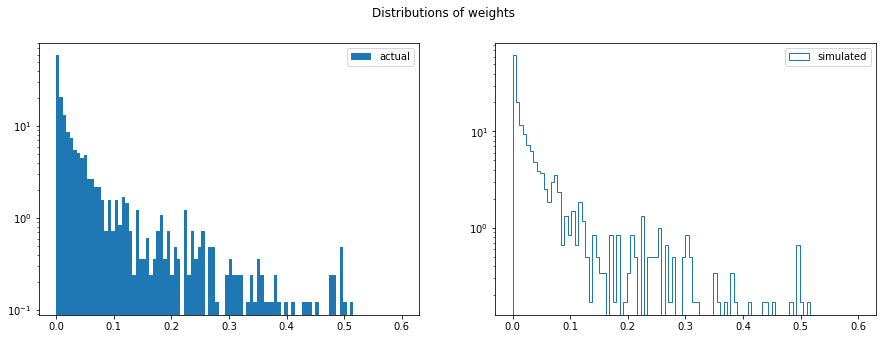

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(binning[:-1], hist, width=np.diff(binning), align='edge', log=True, label='actual')

plt.legend()


plt.subplot(1,2,2)
plt.hist(w_n,log=True, bins=100,range=(0,0.6),density=True,histtype='step', label='simulated')
plt.legend()
plt.suptitle('Distributions of weights')

plt.show()

In [11]:
reduced=W66[0:33,33:]
reduced_2=np.copy(reduced)

# tuples of empty indexes
empty_coords=[(i,j) for i in range(33) for j in range(33) if reduced[i,j]==0]
np.random.shuffle(empty_coords)
np.random.shuffle(w_n)

n_to_fill=350
for i in range(n_to_fill): # the number of empty places i wanto to fill
    reduced_2[empty_coords[i][0], empty_coords[i][1]]=w_n[i]

    
W66_new=np.copy(W66)
W66_new[0:33,33:]=reduced_2
W66_new[33:,0:33]=reduced_2.T

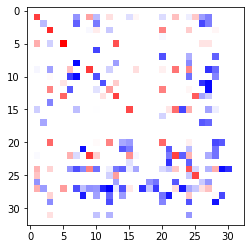

In [38]:
plt.imshow(reduced,norm=colors.LogNorm(), cmap='bwr')
#plt.title('LR connectome unmodified')
plt.savefig('../Figure/connettoma_interemisferica.pdf',bbox_inches='tight')
plt.show()

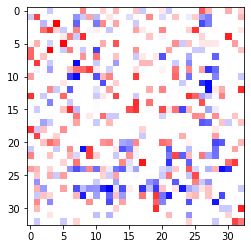

In [36]:
#plt.subplot(3,2,2)
plt.imshow(reduced_2,norm=colors.LogNorm(), cmap='bwr')
#plt.title('LR connectome with %.d new connections'%n_to_fill)
plt.savefig('../Figure/connettoma_interemisferica_350.pdf',bbox_inches='tight')
plt.show()

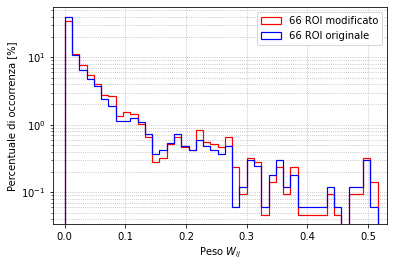

In [37]:
#plt.subplot(3,2,4)
plt.hist(W66_new[W66_new!=0].flatten(),log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='66 ROI modificato', color='r', linewidth=1.2)
plt.hist(W66[W66!=0].flatten(),log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='66 ROI originale', color='b', linewidth=1.2)
plt.legend()
#plt.title('Comparison modified and orginal\n connectome')
plt.xlabel(r'Peso $W_{ij}$')
plt.ylabel('Percentuale di occorrenza [%]')
plt.grid(True,which="both", linestyle='dotted')
plt.xlim(0-0.02,W66_new.max()+0.02)
plt.savefig('../Figure/istogramma_connettoma_modificato.pdf',bbox_inches='tight')
plt.show()

In [ ]:
plt.subplot(3,2,3)
plt.hist(reduced_2[reduced_2!=0].flatten(),log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='W66_new reduced')
plt.hist(reduced[reduced!=0].flatten(),log=True, bins=50,range=(0,0.6),density=True,histtype='step', label='W66_r')
plt.legend()
plt.title('Comparison modified and orginal\n LR *reduced* connectome')

In [ ]:
plt.subplot(3,2,5)
plt.imshow(W66,norm=colors.LogNorm(), cmap='bwr')
plt.title('Connectome W66')

In [ ]:
plt.subplot(3,2,6)
plt.imshow(W66_new,norm=colors.LogNorm(), cmap='bwr')
plt.title('New connectome W66_new')

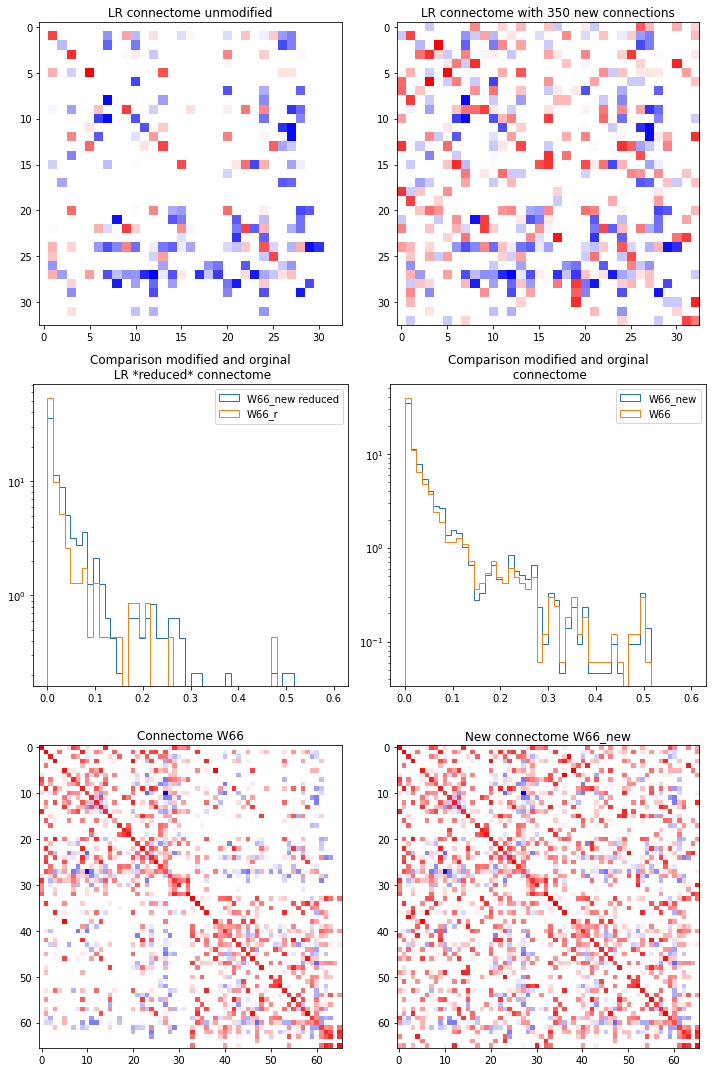

In [12]:
plt.tight_layout()

plt.show()